In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('transformed_housing_data2')

In [2]:
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Ever_Renovated_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,1,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
sale_price = data['Sale_Price']#.head(30)
flat_area = data['Flat Area (in Sqft)']#.head(30)
sample_data = pd.DataFrame({'sale_price': sale_price, 'flat_area': flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
...,...,...
21604,360000.0,1530.0
21605,400000.0,2310.0
21606,402101.0,1020.0
21607,400000.0,1600.0


In [4]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

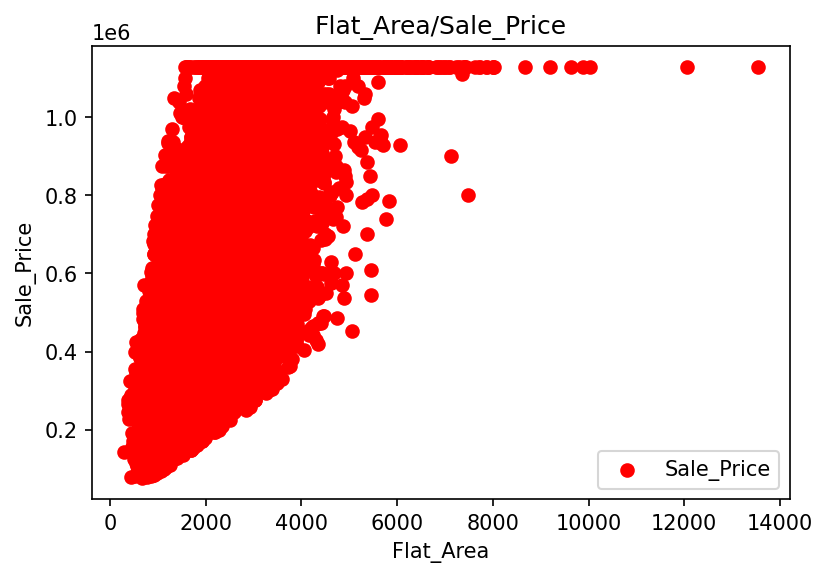

In [5]:
plt.figure(dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red', label = 'Sale_Price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title('Flat_Area/Sale_Price')
plt.legend()
plt.show

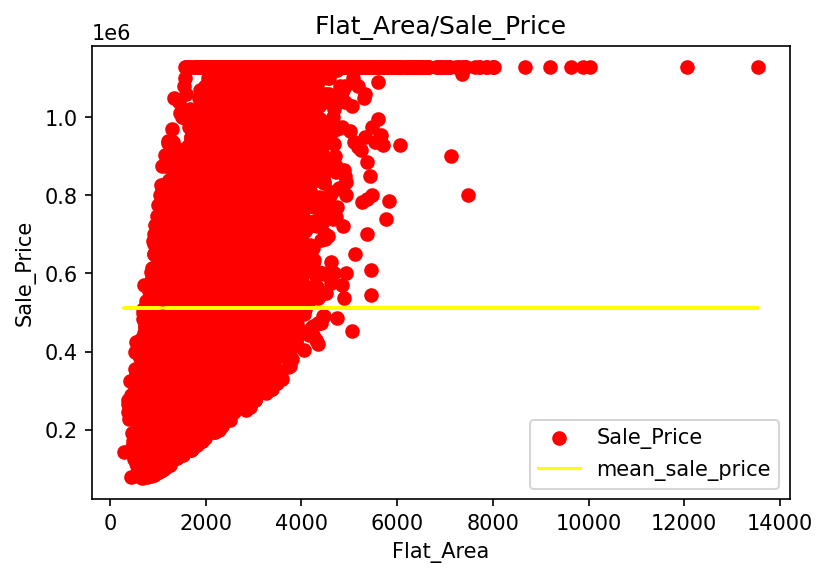

In [6]:
sample_data['mean_sale_price'] = sample_data.sale_price.mean()

plt.figure(dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'red', label = 'Sale_Price')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color = 'yellow', label = 'mean_sale_price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title('Flat_Area/Sale_Price')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error as mse

# linear regression using inperpolating the straight line

In [8]:
def slope_error (slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [9]:
slope = [i/10 for i in range(0, 5000)]
Cost = []
for i in slope :
    cost = slope_error(slope = i, intercept = 0, sample_data = sample_data)
    Cost.append(cost)


In [ ]:
#arranging in the dataframe
Cost_table = pd.DataFrame({'slope': slope, 'Cost': Cost})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


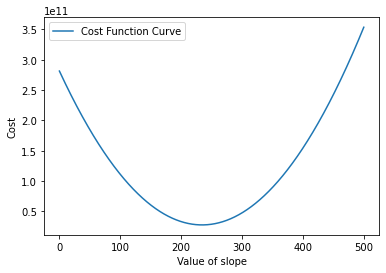

In [ ]:
#plotting the cost function curve
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [ ]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

234.3

In [ ]:
def intercept_error (slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [ ]:
intercept = [i for i in range(5000, 50000)]
Cost = []
for i in intercept :
    cost = intercept_error(slope = 234.3, intercept = i, sample_data = sample_data)
    Cost.append(cost)


In [ ]:
#arranging in the dataframe
Cost_table = pd.DataFrame({'Intercept': intercept, 'Cost': Cost})
Cost_table.head()

,Intercept,Cost
0,5000,2.780450e+10
1,5001,2.780449e+10
2,5002,2.780448e+10
3,5003,2.780447e+10
4,5004,2.780446e+10


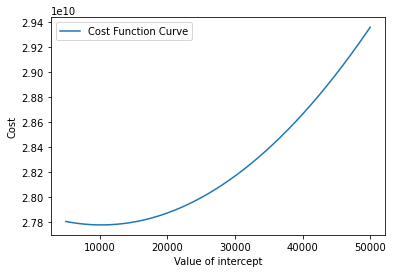

In [ ]:
#plotting the cost function curve
plt.plot(Cost_table.Intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [ ]:
new_slope = Cost_table['Intercept'][Cost_table['Cost'] == Cost_table.Cost.min()].values
new_slope

array([10251], dtype=int64)

In [ ]:
def slope_error (slope, intercept, sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [ ]:
slope = [i/10 for i in range(0, 5000)]
Cost = []
for i in slope :
    cost = slope_error(slope = i, intercept = 10251 , sample_data = sample_data)
    Cost.append(cost)


In [ ]:
#arranging in the dataframe
Cost_table = pd.DataFrame({'slope': slope, 'Cost': Cost})
Cost_table.tail()

,slope,Cost
4995,499.5,3.630749e+11
4996,499.6,3.633238e+11
4997,499.7,3.635728e+11
4998,499.8,3.638219e+11
4999,499.9,3.640712e+11


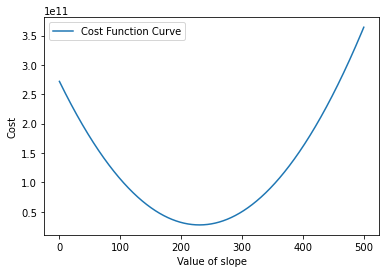

In [ ]:
#plotting the cost function curve
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [ ]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

230.0

In [ ]:
### if this way we keep on repeating the same thing we get the optimum value of slope = 219 and intercept = 31928
### but this is not an efficient way to calculate the optimum valuues of slopes and intercept especially in the case of the 
### multi dimensional lines .........so we need the gradient descent algorithm...